In [1]:
import os
import shutil

folder_path = 'D:/images/gpt-4o-mini'
file_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
print(len(file_list))
print(file_list[0])
detial_filename = []
for i in range(len(file_list)):
    detial_filename.append(folder_path + '/' + file_list[i])
print(detial_filename[0])

2544
1.jpg
D:/images/gpt-4o-mini/1.jpg


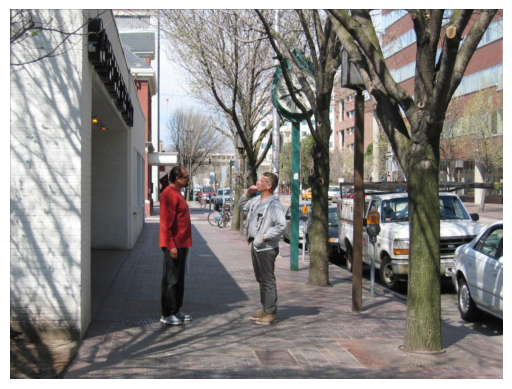

In [2]:
import matplotlib.pyplot as plt

image_path = detial_filename[0]
image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [3]:
system_prompt = """
Please follow the instructions below to describe the direction and spatial relationship between two objects:

1. Based on the visual content of the image, please provide a comprehensive description of the entire scene. Your description should include the following:
   - The overall setting and background context (e.g., indoor/outdoor, urban/natural environment).
   - The number and types of visible objects (e.g., people, vehicles, buildings, furniture).
   - The spatial distribution and relative positions of objects within the scene (e.g., clustered on the left, evenly spread across the image).
   - Any prominent visual structures or compositional features that help define the spatial layout (e.g., roads, walls, floor lines, depth cues in the background).

2. Describe the absolute orientation of the <Reference Object>:
   - Do not compare it to any other object.
   - Only describe its own directional properties.
   - An object is facing the observer if its front side (e.g., face, headlights, screen) is visible and directly oriented toward the viewer.
   - Use absolute terms like: "facing left", "facing right", "facing upward", "facing downward", "facing the observer", "facing away from the observer", or "this object has no inherent direction".
   - An object is considered to have inherent directionality if its front, back, left, or right side can be visually inferred from its shape, posture, or design (e.g., a person, car, or animal). Objects like chairs or cups may have direction depending on their orientation. If no such direction is visually evident, state "this object has no inherent direction".

3. Describe the absolute orientation of the <Target Object>:
   - Do not compare it to any other object.
   - Only describe its own directional properties.
   - Use absolute terms like: "facing left", "facing right", "facing upward", "facing downward", "facing the observer", "facing away from the observer", or "this object has no inherent direction".
   - An object is considered to have inherent directionality if its front, back, left, or right side can be visually inferred from its shape, posture, or design (e.g., a person, car, or animal). Objects like chairs or cups may have direction depending on their orientation. If no such direction is visually evident, state "this object has no inherent direction".

4. Describe the relative position of the <Target Object> with respect to the <Reference Object>:
   - If at least one of the two objects has directionality, provide both **Egocentric** and **Allocentric** perspectives.
   - If neither of the two objects has directionality, provide **Egocentric** only.
   - All sections must be filled. If a description does not apply (e.g., no allocentric), explicitly state "No Allocentric."

   * Egocentric Description (Observer-Centered):
      I. Treat both the Reference Object and the Target Object as 2D bounding boxes in screen space.
      II. Think of the image as a nine-square grid. Describe their **individual screen positions** using the following "standard screen positions" terms:
         - "upper left", "upper center", "upper right", "center left", "center", "center right", "lower left", "lower center", "lower right".
      III. Then describe their **relative screen positions**, using terms like:
         - "<Target Object> is at the same position as the <Reference Object>."
         - "<Target Object> is above the <Reference Object>."
         - "<Target Object> is below the <Reference Object>."
         - "<Target Object> is to the left of the <Reference Object>."
         - "<Target Object> is to the right of the <Reference Object>."
         - "<Target Object> is to the upper left of the <Reference Object>."
         - "<Target Object> is to the lower left of the <Reference Object>."
         - "<Target Object> is to the upper right of the <Reference Object>."
         - "<Target Object> is to the lower right of the <Reference Object>."
      IV. A depth relationship is considered visible if the image clearly shows one object occluding the other, or if perspective and size cues suggest relative distance from the observer.
      V. If a depth relationship is visible, indicate which object is closer or farther from the observer using one of the following sentence structures.  If not have depth relationship, don't reply:
         - "<Target Object> is between the observer and the <Reference Object>."
         - "<Reference Object> is closer to the observer than the <Target Object>."
         - "<Target Object> is farther from the observer than the <Reference Object>."
         
   * Allocentric Description (Reference Object-Centered):
      - Use the orientation of the <Reference Object> to describe the location of the <Target Object>.
      - Use spatial terms such as: in front of, behind, to the left of, to the right of, diagonally front-left, etc.

Use clear, objective, and neutral language. Avoid any subjective interpretations or emotional judgments. Respond strictly using the specified format below:  


Overall Image Description: <Overall Image Description>

Reference Object: <Reference Object>
Target Object: <Target Object>

Reference Object Absolute Direction: <Reference Object> is facing <Direction>
Target Object Absolute Direction: <Target Object> is facing <Direction>

Perspective: Egocentric (from the observer's point of view)
Answer: The <Reference Object> is on the <Position> of the image, the <Target Object> is on the <Position> of the image, and in the image, <Target Object> is <Direction> <Reference Object>.

Perspective: Allocentric (from the <Reference Object>'s point of view)
Answer: From the <Reference Object>'s point of view, the <Target Object> is <Direction> of the <Reference Object>.


Example 1:

Overall Image Description: The image shows a heartwarming scene of a golden retriever lying on the floor next to a gray and white cat. The cat is gently nuzzling the dog's face, creating a sense of affection between the two pets. In front of them is a white bowl, likely containing food, suggesting they might be sharing a meal. The setting appears to be a cozy indoor space with white cabinets, shelves with books or papers, and a light-colored floor.

Reference Object: Dog
Target Object: Cat

Reference Object Absolute Direction: The dog is facing the observer
Target Object Absolute Direction: The cat is facing left

Perspective: Egocentric (from the observer's point of view)
Answer: The dog is on the left middle of the image, the cat is on the right middle of the image, and in the image, cat is to the right of dog.

Perspective: Allocentric (from the Dog's point of view)
Answer: From the dog's perspective, the cat is on its right side.

Example 2:

Overall Image Description: This image shows two plastic buckets placed on a smooth, light-colored surface. The bucket in the foreground is blue with a white handle, while the bucket behind it is red, also with a white handle. The blue bucket is positioned slightly to the left and in front of the red one, creating a clear sense of depth and perspective. The scene appears to be well-lit, likely photographed indoors or in a shaded outdoor setting. The overall composition is simple and minimalistic.

Reference Object: Red bucket
Target Object: Blue bucket

Reference Object Absolute Direction: The red bucket has no inherent direction
Target Object Absolute Direction: The blue bucket has no inherent direction

Perspective: Egocentric (from the observer's point of view)
Answer: The red bucket is on the upper right of the image, the blue bucket is on the center left of the image, and in the image, the red bucket is to the upper right of the blue bucket.

Perspective: Allocentric (from the red bucket's point of view)
Answer: No Allocentric.
"""

print(system_prompt)


Please follow the instructions below to describe the direction and spatial relationship between two objects:

1. Based on the visual content of the image, please provide a comprehensive description of the entire scene. Your description should include the following:
   - The overall setting and background context (e.g., indoor/outdoor, urban/natural environment).
   - The number and types of visible objects (e.g., people, vehicles, buildings, furniture).
   - The spatial distribution and relative positions of objects within the scene (e.g., clustered on the left, evenly spread across the image).
   - Any prominent visual structures or compositional features that help define the spatial layout (e.g., roads, walls, floor lines, depth cues in the background).

2. Describe the absolute orientation of the <Reference Object>:
   - Do not compare it to any other object.
   - Only describe its own directional properties.
   - An object is facing the observer if its front side (e.g., face, head

In [ ]:
import base64
import sys
import csv
from openai import OpenAI
import mimetypes

client = OpenAI(api_key="your_api_key")
MODEL = "gpt-4o"

for i in range(500): #len(file_list)
    mime_type, _ = mimetypes.guess_type(detial_filename[i])

    with open(detial_filename[i], "rb") as img_file:
        base64_images = base64.b64encode(img_file.read()).decode('utf-8')

    messages = [{"role": "user", "content": [
        {"type": "text", "text": system_prompt},
        {"type": "image_url", "image_url": {"url": f"data:image/jpg;base64,{base64_images}"}}
    ]}]

    response = client.chat.completions.create(
        model=MODEL,
        messages=messages,
        temperature=0.0,
    )

    ai_message = response.choices[0].message.content
    print("Image path:", detial_filename[i])
    print("gpt-4o:", ai_message)

    with open('./gpt-4o.csv', 'a', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow([detial_filename[i], ai_message])

sys.stdout.flush()

Image path: D:/images/gpt-4o-mini/1.jpg
gpt-4o: Overall Image Description: The image depicts an urban outdoor setting with two people standing on a sidewalk. The scene includes a white building on the left, several trees lining the street, and parked vehicles on the right. The background shows more buildings and a clear sky. The two individuals are facing each other, engaged in conversation, with one wearing a red jacket and the other a gray jacket.

Reference Object: Person in red jacket
Target Object: Person in gray jacket

Reference Object Absolute Direction: The person in the red jacket is facing right
Target Object Absolute Direction: The person in the gray jacket is facing left

Perspective: Egocentric (from the observer's point of view)
Answer: The person in the red jacket is on the left center of the image, the person in the gray jacket is on the center of the image, and in the image, the person in the gray jacket is to the right of the person in the red jacket.

Perspective: A